In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from google.colab import files
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [14]:
merged_df = pd.read_csv('/content/merged_df.csv')

In [17]:
start_column_1 = 'Week 1 quiz'
end_column_1 = 'Week 15 homework'
merged_df['Sum1'] = merged_df.loc[:, start_column_1:end_column_1].sum(axis=1)

start_column_2 = 'Week 1 homework maxscore'
end_column_2 = 'Week 9 quiz maxscore'
merged_df['Sum2'] = merged_df.loc[:, start_column_2:end_column_2].sum(axis=1)

merged_df.to_csv('classification_data.csv', index=False)

In [18]:
classification_data = pd.read_csv('/content/classification_data.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

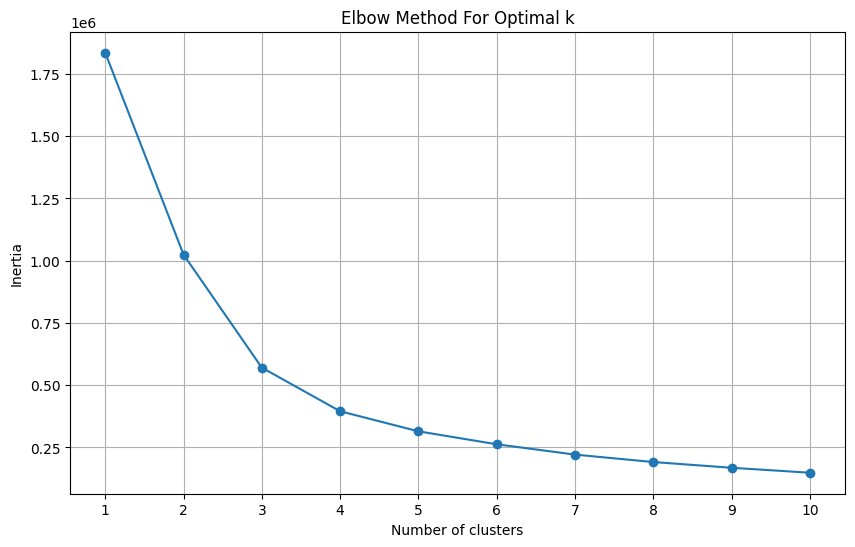

In [22]:
# 使用肘部方法寻找最佳 K 值
inertia = []
k_values = range(1, 11)  # 从 1 到 10 的 K 值

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(classification_data[['Sum1', 'Sum2', 'Score']])
    inertia.append(kmeans.inertia_)

# 绘制肘部图
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


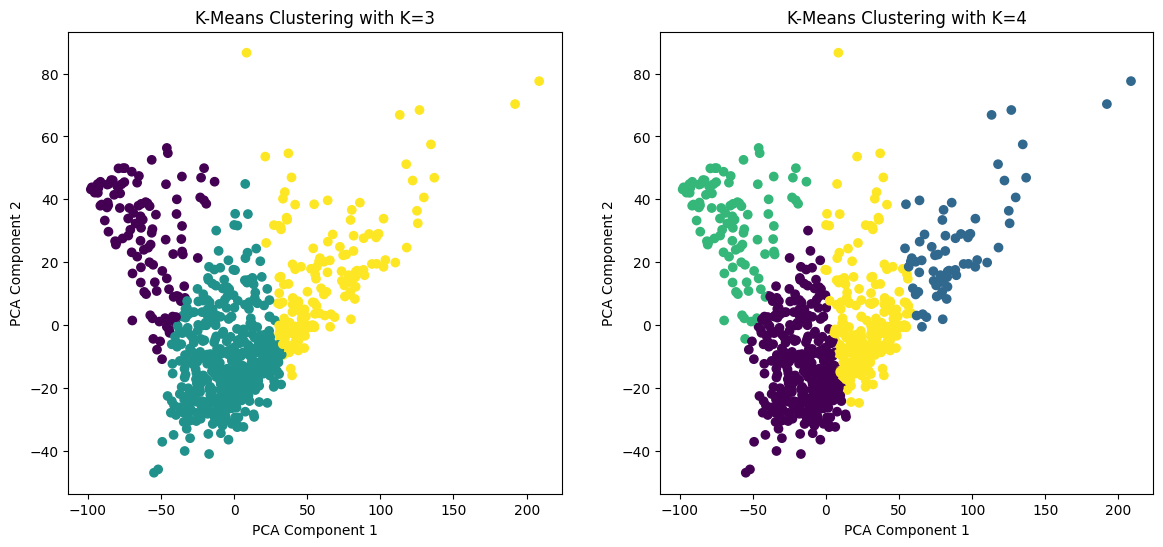

In [27]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 选择特征
features = classification_data[['Sum1', 'Sum2', 'Score']]

# 使用 KMeans 进行聚类，k=3 和 k=4
kmeans_3 = KMeans(n_clusters=3, random_state=42).fit(features)
kmeans_4 = KMeans(n_clusters=4, random_state=42).fit(features)

# 将数据降至二维以便可视化
pca = PCA(n_components=2)
data_pca = pca.fit_transform(features)

# 可视化聚类结果
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# k=3 的聚类结果
axes[0].scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_3.labels_, cmap='viridis')
axes[0].set_title('K-Means Clustering with K=3')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')

# k=4 的聚类结果
axes[1].scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_4.labels_, cmap='viridis')
axes[1].set_title('K-Means Clustering with K=4')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')

plt.show()

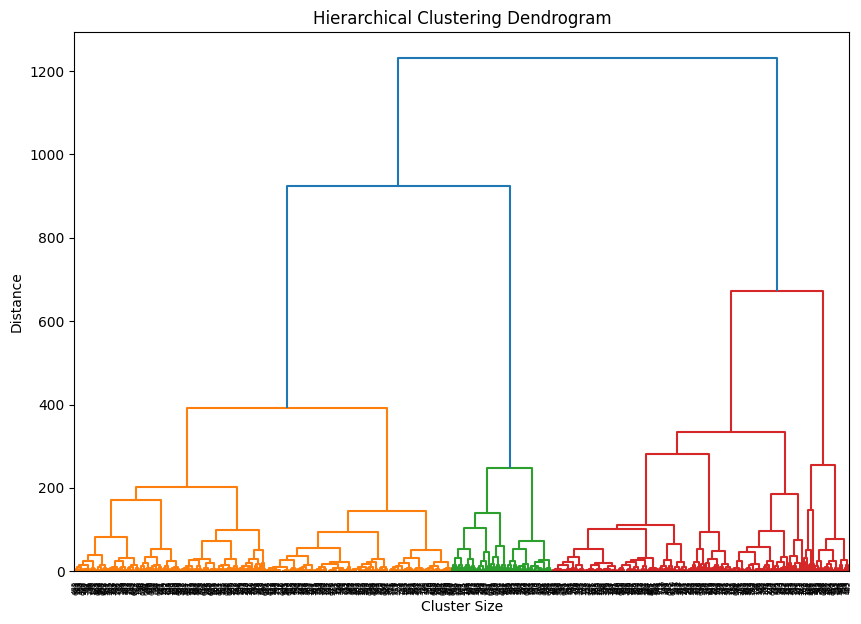

In [24]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 使用层次聚类
linked = linkage(classification_data[['Sum1', 'Sum2', 'Score']], method='ward')

# 绘制树状图
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

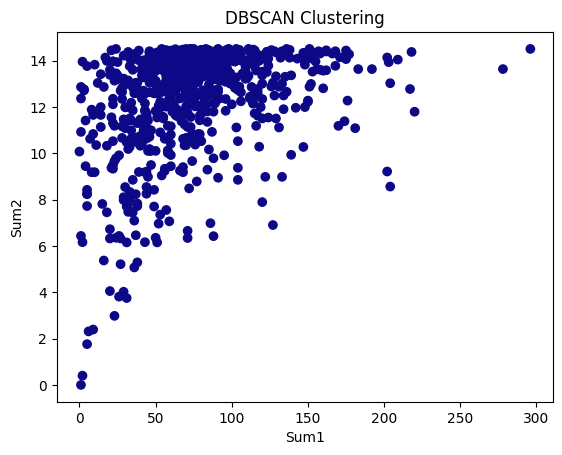

In [25]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 应用 DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # 这里的 eps 和 min_samples 需要根据数据进行调整
clusters = dbscan.fit_predict(classification_data[['Sum1', 'Sum2', 'Score']])

# 可视化结果
plt.scatter(classification_data['Sum1'], classification_data['Sum2'], c=clusters, cmap='plasma')
plt.title('DBSCAN Clustering')
plt.xlabel('Sum1')
plt.ylabel('Sum2')
plt.show()

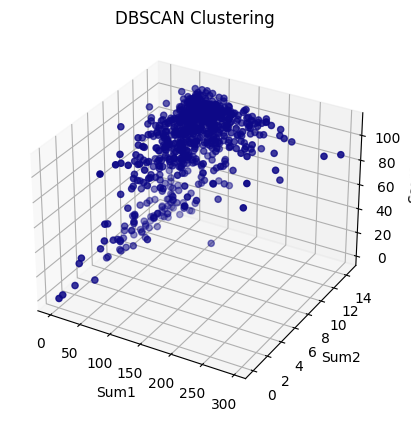

In [26]:
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 应用 DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # 调整 eps 和 min_samples 以适应您的数据
clusters = dbscan.fit_predict(classification_data[['Sum1', 'Sum2', 'Score']])

# 三维可视化
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(classification_data['Sum1'], classification_data['Sum2'], classification_data['Score'], c=clusters, cmap='plasma')
ax.set_title('DBSCAN Clustering')
ax.set_xlabel('Sum1')
ax.set_ylabel('Sum2')
ax.set_zlabel('Score')
plt.show()

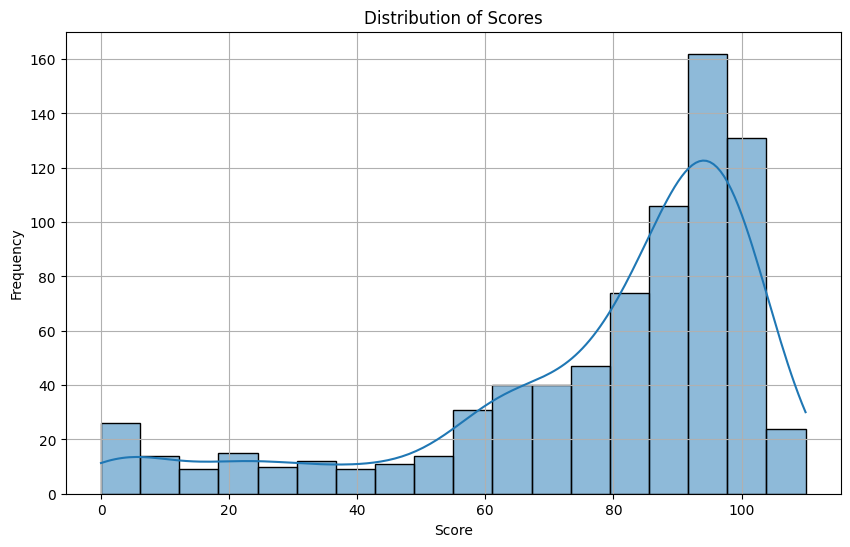

count    775.000000
mean      77.608723
std       26.622073
min        0.000000
25%       67.490000
50%       87.400000
75%       96.105000
max      110.000000
Name: Score, dtype: float64

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the 'Score' column
plt.figure(figsize=(10, 6))
sns.histplot(classification_data['Score'], kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Descriptive statistics of the 'Score' column
classification_data['Score'].describe()